In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA as pca
import matplotlib.pyplot as plt


file_path = 'SP500_close_price_no_missing.csv'
sp500_data = pd.read_csv(file_path)

log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1))

log_returns.head()
#question 1 - A - 1

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
3,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
4,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526


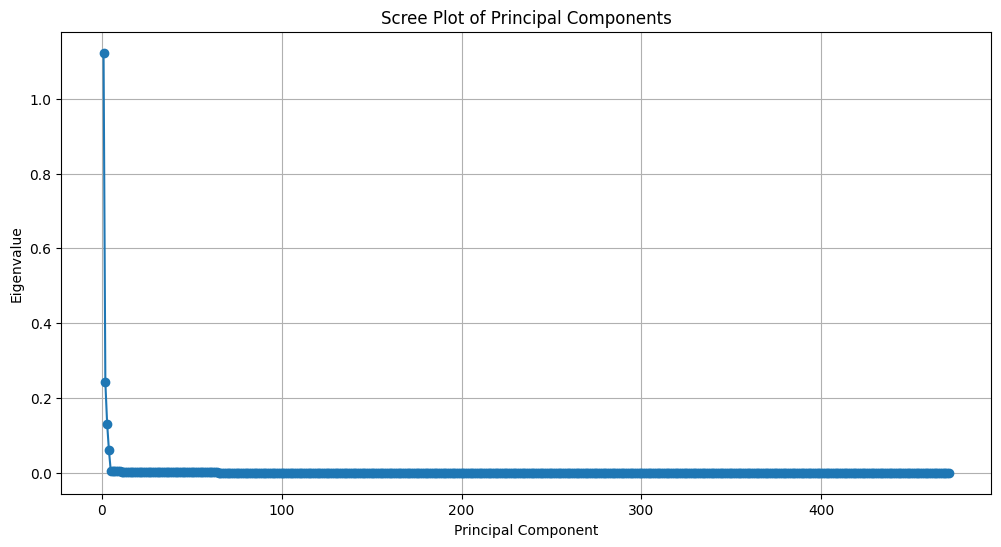

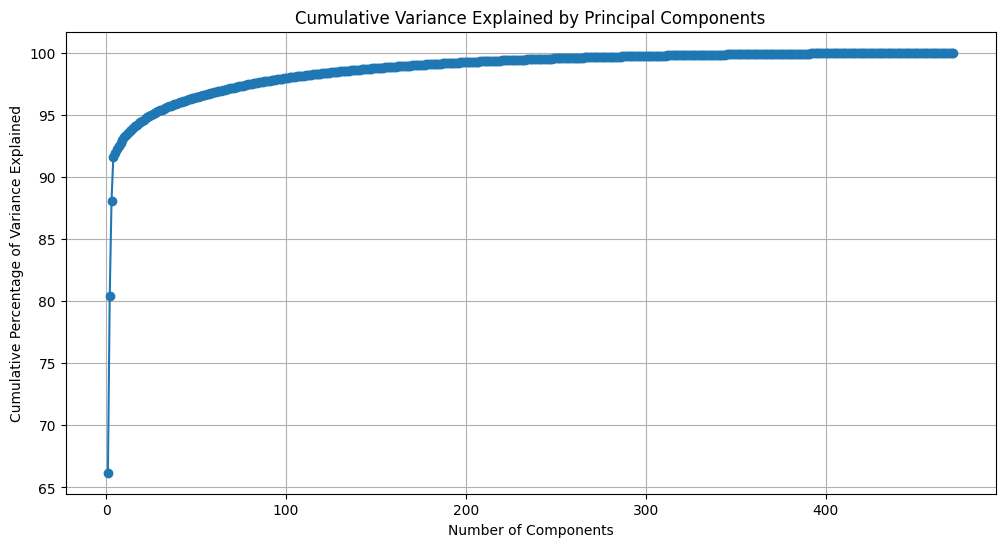

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(log_returns.dropna())

plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.grid(True)
plt.show()

#question 1 - A - 2 & 3

In [20]:
num_components_80_variance = np.where(cumulative_variance >= 80)[0][0] + 1
num_components_80_variance
#question 1 - 1 - 4

2

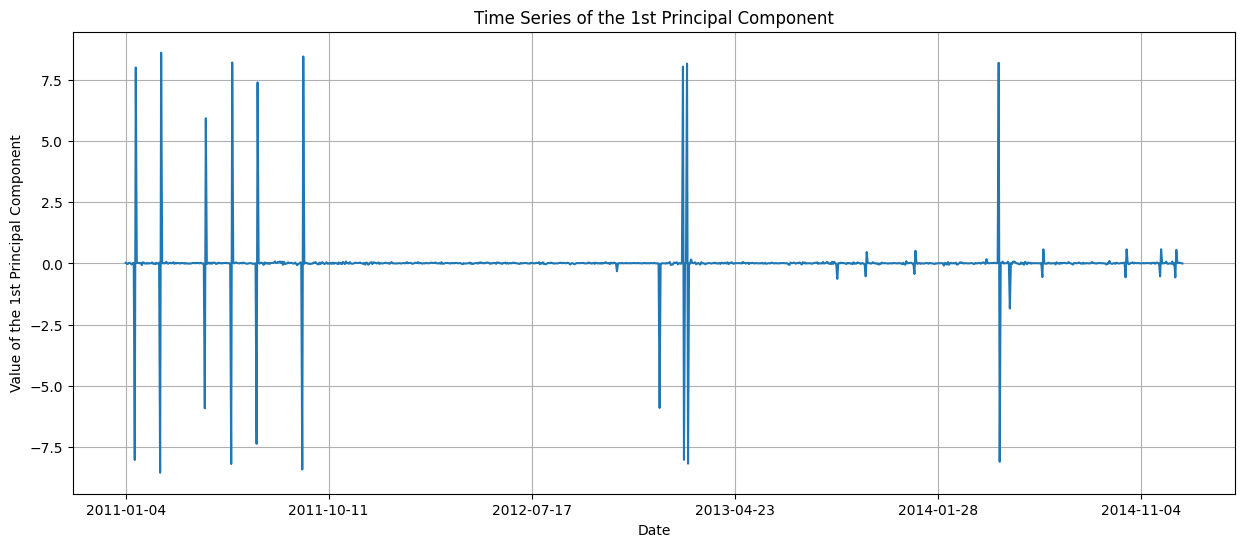

('2011-02-21', -8.54889002497181)

In [9]:

log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1))


log_returns_dropped = log_returns.dropna()


pca = PCA()
pca.fit(log_returns_dropped)


first_principal_component = pca.transform(log_returns_dropped)[:, 0]


dates_adjusted = sp500_data['date'][log_returns_dropped.index]

first_pc_series = pd.Series(first_principal_component, index=dates_adjusted)

plt.figure(figsize=(15, 6))
first_pc_series.plot()
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value of the 1st Principal Component')
plt.grid(True)
plt.show()

min_value_date = first_pc_series.idxmin()
min_value_date, first_pc_series[min_value_date]

In [10]:
# Extracting the weights (loadings) of the 1st and 2nd principal components
pc1_weights = pca.components_[0]
pc2_weights = pca.components_[1]

# Creating a DataFrame to display these weights
weights_df = pd.DataFrame({
    'Stock': sp500_data.columns[1:],  # Stock ticker symbols
    'PC1 Weights': pc1_weights,
    'PC2 Weights': pc2_weights
})

weights_df.head()


,Stock,PC1 Weights,PC2 Weights
0,MMM,-0.000253,-0.000499
1,ACE,-0.000424,-0.000912
2,ABT,0.000071,-0.000076
3,ANF,-0.000285,0.000185
4,ADBE,-0.000573,-0.000188


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Calculating log returns
log_returns = np.log(sp500_data.iloc[:, 1:] / sp500_data.iloc[:, 1:].shift(1)).dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Extracting the weights (loadings) of the 1st and 2nd principal components
pc1_weights = pca.components_[0]
pc2_weights = pca.components_[1]

# Creating a DataFrame to display these weights
weights_df = pd.DataFrame({
    'Stock': sp500_data.columns[1:],  # Stock ticker symbols
    'PC1 Weights': pc1_weights,
    'PC2 Weights': pc2_weights
})

# Load the ticker information file with sector data
ticker_file_path = 'SP500_ticker.csv'  # Update with the actual path to your ticker information file


ticker_data = pd.read_csv(ticker_file_path,  encoding='ISO-8859-1')

# Merging the weights with ticker information
merged_data = pd.merge(weights_df, ticker_data, left_on='Stock', right_on='Ticker', how='left')

# Grouping by industry sector and calculating mean weight for each sector
sector_mean_weights = merged_data.groupby('Sector')['PC1 Weights'].mean()

# Creating a bar plot of mean weight per sector
plt.figure(figsize=(12, 6))
sector_mean_weights.plot(kind='bar')
plt.title('Mean Weights of the 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


KeyError: 'Ticker'

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = 'BMI.csv'
bmi_data = pd.read_csv(file_path)

# Splitting the data into features (X) and target variable (y)
X = bmi_data.drop('fatpctg', axis=1)
y = bmi_data['fatpctg']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Wrapper Method - Backward Elimination
linear_reg = LinearRegression()
rfe_backward = RFE(estimator=linear_reg, n_features_to_select=1, step=1)
rfe_backward.fit(X_train, y_train)
backward_features_ranking = pd.DataFrame({'Feature': X.columns, 'Backward Ranking': rfe_backward.ranking_})

# Wrapper Method - Forward Selection
# Note: Sklearn does not have a built-in method for forward selection, 
# so we use backward elimination with the full set of features and sort by ranking
rfe_forward = RFE(estimator=linear_reg, n_features_to_select=len(X.columns), step=1)
rfe_forward.fit(X_train, y_train)
forward_features_ranking = pd.DataFrame({'Feature': X.columns, 'Forward Ranking': rfe_forward.ranking_})

# Filter Method - Correlation Ranking
correlations = bmi_data.corr()['fatpctg'].drop('fatpctg').abs().sort_values(ascending=False)
correlation_ranking = pd.DataFrame({'Feature': correlations.index, 'Correlation with fatpctg': correlations.values})

# Embedded Method - Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coeff = pd.DataFrame({'Feature': X.columns, 'Lasso Coefficient': lasso.coef_})

# Embedded Method - Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
forest_importances = pd.DataFrame({'Feature': X.columns, 'Random Forest Importance': random_forest.feature_importances_})

# Combining results
feature_selection_results = pd.concat([
    backward_features_ranking.set_index('Feature'),
    forward_features_ranking.set_index('Feature'),
    correlation_ranking.set_index('Feature'),
    lasso_coeff.set_index('Feature'),
    forest_importances.set_index('Feature')
], axis=1)

feature_selection_results.sort_values(by='Backward Ranking')  # Sorting by backward ranking for visualization



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/BMI.csv'